# 📊 **Pearson Correlation Coefficient: Faker's MSI 2022 Stats**

---

## **Introduction** ✨

In this notebook, we will explore how to calculate the **Pearson Correlation Coefficient** using a dataset of **Faker's MSI 2022 champion stats**.

The **Pearson correlation coefficient** is a **statistical measure** that quantifies the **linear relationship** between two variables. It tells us:
- How **strongly** the two variables are related.
- Whether the relationship is **positive**, **negative**, or if there is **no significant correlation**.

---

## **Objective** 🎯

The main goal of this analysis is to:
- **Read** the dataset, **"Faker_All_Games_MSI_2022.csv"**.
- Understand the **variables** in the dataset and examine their relationships.
- **Calculate** the **Pearson Correlation Coefficient** between different attributes such as **Kills**, **KDA**, and **CS** and analyze the results.

---

## **Steps** 🔍

1. **Read the Dataset**:  
   We’ll first load the CSV file and take a look at its structure to understand the data.
   
2. **Calculate Pearson Correlation**:  
   Next, we will compute the correlation coefficient for various variables in the dataset, including **Kills** (K), **KDA**, **CS**, and others.
   
3. **Interpret the Results**:  
   Finally, we’ll interpret the correlation values and draw insights from the relationships between the variables. We will also explore possible practical implications within the esports context, such as how **Kills** might relate to a player's **KDA** or the importance of **CS Lead**.

---

## **Prerequisites** 📦

- Python 3.x
- **pandas** library (for data manipulation and analysis)
- **matplotlib** and **seaborn** libraries (for data visualization)

---

Let’s start by **loading** the dataset and checking the first few rows to see what we’re working with. 🚀


<hr style="border: 0; border-top: 4px solid pink; padding: 4px 0;">


In [18]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# Load the CSV file for Faker's games in MSI 2022
df = pd.read_csv('Faker All Games in MSI 2022.csv', encoding='ISO-8859-1')

In [20]:
df.head()

,Date,Tournament,W/L,Player,Side,Team,Vs,Game Length,Champion,Vs Champion,K,D,A,KDA,Spells,Rune,CS,CS Lead,Items
0,2022-05-28 9:59:00,"International,MSI 2022",Win,Faker,Red,T1,G2 Esports,20:43,Akali,Zoe,5,1,5,10.00,"Teleport,Flash",Conqueror,146,+13,"Hextech Rocketbelt,Needlessly Large Rod,,Hexte..."
1,2022-05-28 9:04:00,"International,MSI 2022",Win,Faker,Red,T1,G2 Esports,32:12,LeBlanc,Ahri,8,3,5,4.33,"Ignite,Flash",Electrocute,279,+9,"Corrupting Potion,Luden's Tempest,Rabadon's De..."
2,2022-05-28 8:17:00,"International,MSI 2022",Win,Faker,Blue,T1,G2 Esports,24:11,Tristana,Galio,5,1,2,7.00,"Ignite,Flash",Press the Attack,225,+73,"Galeforce,Infinity Edge,Tear of the Goddess,Lo..."
3,2022-05-24 10:37:00,"International,MSI 2022",Win,Faker,Blue,T1,Royal Never Give Up,32:30,Ahri,Twisted Fate,2,1,5,7.00,"Teleport,Flash",Electrocute,292,â¬,"Everfrost,Corrupting Potion,Morellonomicon,Dar..."
4,2022-05-24 7:55:00,"International,MSI 2022",Win,Faker,Red,T1,Saigon Buffalo,23:26,Twisted Fate,Galio,3,1,11,14.00,"Teleport,Flash",Unsealed Spellbook,192,+12,"Everfrost,Corrupting Potion,Broken Stopwatch,R..."


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         19 non-null     object 
 1   Tournament   19 non-null     object 
 2   W/L          19 non-null     object 
 3   Player       19 non-null     object 
 4   Side         19 non-null     object 
 5   Team         19 non-null     object 
 6   Vs           19 non-null     object 
 7   Game Length  19 non-null     object 
 8   Champion     19 non-null     object 
 9   Vs Champion  19 non-null     object 
 10  K            19 non-null     int64  
 11  D            19 non-null     int64  
 12  A            19 non-null     int64  
 13  KDA          19 non-null     float64
 14  Spells       19 non-null     object 
 15  Rune         19 non-null     object 
 16  CS           19 non-null     int64  
 17  CS Lead      19 non-null     object 
 18  Items        19 non-null     object 
dtypes: float64

# Possible Correlations to Explore

Once we have the numeric variables, here are some relationships we might explore:

---

### **1. Kills vs. KDA** 🔫 ➡️ 📊
- **Question**: Does having more kills correlate with a higher KDA?
- **Expected Outcome**: We might expect a **positive correlation**, as getting more kills generally improves the KDA ratio. Players who get more kills tend to have better overall performance.

---

### **2. Kills vs. Deaths** 💀 ➡️ ⚰️
- **Question**: Does the number of kills correlate with the number of deaths?
- **Expected Outcome**: We could check if there's a **negative relationship** between these two, i.e., more kills might indicate fewer deaths (or vice versa). It is expected that a high number of kills is often associated with fewer deaths.

---

### **3. Assists vs. KDA** 👐 ➡️ 📈
- **Question**: Does getting more assists correlate with a higher KDA?
- **Expected Outcome**: Assists could be indicative of **good teamwork** and might lead to a **higher KDA**. We expect a positive correlation, as players who contribute to their team's kills will likely have a higher KDA.

---

### **4. CS vs. Kills** 💀 ➡️ 🏹
- **Question**: Is there a relationship between the number of minions Faker kills (CS) and the number of kills in the game?
- **Expected Outcome**: Higher CS might correlate with higher kills, as **farming well** allows for better scaling into the **mid and late game**. This relationship could indicate that players who focus on farm tend to carry better into team fights.
---

These correlations could provide useful insights into **Faker's performance** and how different aspects of his gameplay are interrelated.


In [22]:
# EXAMPLE (in manual calculation)

# These are the columns to work with
x = df['K']  # Kills
y = df['KDA']  # KDA

In [23]:
# Number of data points (n)
n = len(x)

In [24]:
# Compute the necessary sums
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x_squared = np.sum(x**2)
sum_y_squared = np.sum(y**2)
sum_xy = np.sum(x * y)

In [25]:
# Apply the Pearson correlation formula
numerator = n * sum_xy - sum_x * sum_y
denominator = np.sqrt((n * sum_x_squared - sum_x**2) * (n * sum_y_squared - sum_y**2))

In [26]:
# Calculate the Pearson correlation coefficient
r = numerator / denominator

In [27]:
print("Manual Pearson correlation between Kills and KDA:", r)

Manual Pearson correlation between Kills and KDA: 0.25541715850437535


### A Pearson correlation coefficient of 0.26 between Kills (K) and KDA suggests that there is a weak positive linear relationship between the two variables.

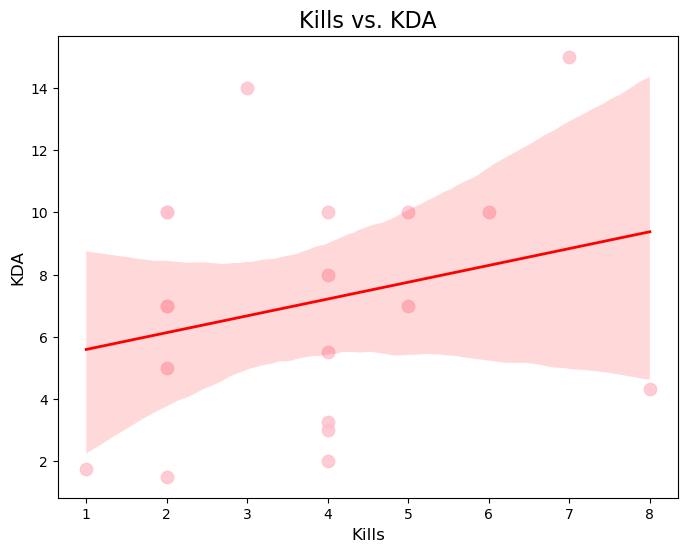

In [28]:
# Scatter plot and regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='K', y='KDA', data=df, scatter_kws={'s': 80, 'color': 'pink'}, line_kws={'color': 'red', 'lw': 2})

# Title and labels
plt.title('Kills vs. KDA', fontsize=16)
plt.xlabel('Kills', fontsize=12)
plt.ylabel('KDA', fontsize=12)

# Show plot
plt.show()


## What Does This Mean?

- **Weak Positive Correlation:**  The value of 0.26 indicates a weak positive correlation, meaning that as the number of Kills increases, the KDA tends to increase slightly. However, the relationship is weak and not very strong.

- **Non-Linear:** While there's a trend, the points in the scatter plot likely showed significant spread around the regression line, meaning the relationship is not perfectly linear.

- **Real-World Implications:** In the context of gaming or esports:
This  suggests that having more kills does not guarantee a dramatically better KDA.
KDA is also influenced by other factors like deaths, assists, and team play, so even though Kills have a slight positive relationship with KDA, other factors are likely more important in determining KDA.

## ANOTHER APPROACH

In [29]:
from scipy import stats

In [30]:
# Calculate Pearson correlation
res = stats.pearsonr(x, y)
print("Pearson correlation coefficient:", res[0])
print("P-value:", res[1])

Pearson correlation coefficient: 0.255417158504375
P-value: 0.29124811065729656


In [31]:
# Calculate Pearson correlation
r, _ = stats.pearsonr(x, y)

# Number of data points
n = len(x)

# Calculate t-statistic
t_stat = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)

# Degrees of freedom
d_f = n - 2

# Calculate p-value from the t-distribution
p_value = stats.t.sf(np.abs(t_stat), d_f) * 2  # Two-tailed p-value

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 1.0892410189770039
P-value: 0.2912481106572966


## Using Heatmap

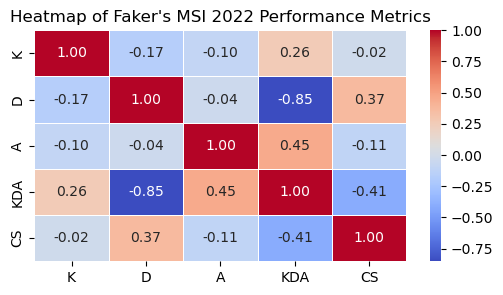

In [55]:
# Selected relevant numeric columns
numeric_cols = ['K', 'D', 'A', 'KDA', 'CS']
correlation_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Faker's MSI 2022 Performance Metrics")
plt.show()

<hr style="border: 0; border-top: 4px solid pink; padding: 4px 0;">

## Key Observations

**Kills (K) vs. KDA (0.26, weak positive correlation)**

-  More kills slightly improve KDA, but not strongly.
- KDA is also influenced by deaths and assists, not just kills.

**Deaths (D) vs. KDA (-0.85, strong negative correlation)**

- A very strong negative correlation, meaning fewer deaths lead to higher KDA.
- This makes sense since KDA is affected negatively by a high death count.

**Assists (A) vs. KDA (0.45, moderate positive correlation)**
- Players who get more assists tend to have higher KDA, reinforcing that teamwork plays a role in performance.

**CS (Creep Score) vs. KDA (-0.41, moderate negative correlation)**

- A surprising negative correlation suggests that farming (CS) might not always lead to a higher KDA.
- This could mean Faker’s playstyle balances farming and fighting, or his role in the team affects this metric.

**Kills (K) vs. Deaths (D) (-0.17, weak negative correlation)**

 - A slight negative relationship suggests that players who get more kills may die slightly less, but it's not a strong trend.
 
## Takeaways
- The strongest correlation is between Deaths and KDA (-0.85), showing that minimizing deaths is the most crucial factor for achieving a high KDA.
- Assists contribute moderately to KDA, reinforcing the importance of teamwork.
- Kills and KDA are weakly correlated, meaning kills alone are not a strong indicator of overall performance.

# 📊 **Analysis of Valorant Esports Player Stats at LAN Events (Till May 2022): Understanding the Impact of Kills, Assists, and ACS/Map on KDA**

## **Multiple Linear Regression: R-Squared and Ajusted R - Squared Calculation** 📊

### **Objective** 🎯
In this section, we performed a **Multiple Linear Regression** to understand how well certain variables explain the variation in **KDA (Kills/Deaths/Assists ratio)**. Specifically, we were interested in answering the following:

- **How much of the variation in KDA can be explained by the independent variables like Kills, Assists, and ACS/Map?**
- **What is the strength of the relationship between these variables and KDA?**

We used the **"Valo Lan Stats.csv"** dataset, which includes the following columns:

- **K (Kills)**
- **D (Deaths)**
- **A (Assists)**
- **ACS/Map (Average Combat Score per Map)**
- **KDA (Kills/Deaths/Assists ratio)**

### **R-Squared Calculation** 🔢

The **R-squared** metric was calculated to evaluate the explanatory power of the independent variables on the **KDA**. In other words, **R-squared** tells us how well the combination of Kills, Assists, and ACS/Map explains the variability in KDA. 

- A higher **R-squared** value indicates that the independent variables explain a large portion of the variation in KDA.
- **Adjusted R-squared** is used to account for the number of variables in the model and prevent overfitting.


In [37]:
# Load the CSV file for Faker's games in MSI 2022
df2 = pd.read_csv('Valo Lan Stats.csv', encoding='ISO-8859-1')

In [38]:
df2.head()

,ï»¿Country,Player,Team,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map
0,Japan,Ade,Crazy Raccoon,10,95,148,59,0.64,1.04,125.50,9.50,14.80,5.90
1,Japan,Fisker,Crazy Raccoon,10,122,164,39,0.74,0.98,176.50,12.20,16.40,3.90
2,South Korea,Bazzi,Crazy Raccoon,5,62,74,25,0.84,1.18,208.00,12.40,14.80,5.00
3,South Korea,Munchkin,Crazy Raccoon,14,272,229,69,1.19,1.49,193.75,19.43,16.36,4.93
4,Japan,Neth,Crazy Raccoon,14,183,212,73,0.86,1.21,177.50,13.07,15.14,5.21


In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ï»¿Country  160 non-null    object 
 1   Player      160 non-null    object 
 2   Team        160 non-null    object 
 3   Maps        160 non-null    int64  
 4   K           160 non-null    int64  
 5   D           160 non-null    int64  
 6   A           160 non-null    int64  
 7   KD          160 non-null    float64
 8   KDA         160 non-null    float64
 9   ACS/Map     160 non-null    float64
 10  K/Map       160 non-null    float64
 11  D/Map       160 non-null    float64
 12  A/Map       160 non-null    float64
dtypes: float64(6), int64(4), object(3)
memory usage: 16.4+ KB


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [41]:
# Load the dataset
df2 = pd.read_csv('Valo Lan Stats.csv')

In [42]:
# Select dependent (y) and independent (X) variables
y = df2['KDA']  # Dependent variable (target)
X = df2[['K', 'A', 'ACS/Map', 'K/Map', 'D/Map']]  # Independent variables (features)

In [43]:
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [44]:
# Get the R-squared value
r_squared = model.score(X, y)
print(f"R-squared: {r_squared:.4f}")

R-squared: 0.9109


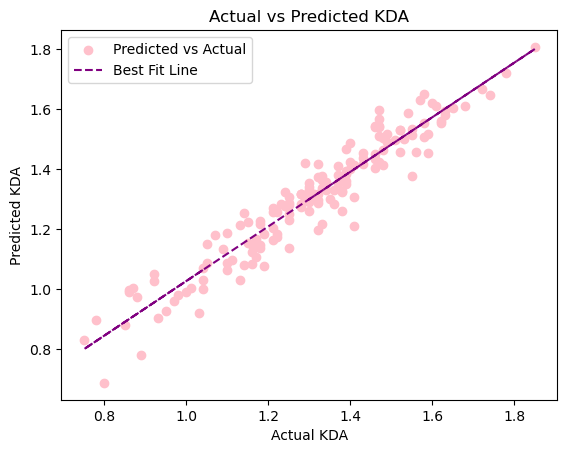

In [46]:
# Predict using the model
y_pred = model.predict(X)

# Create scatter plot
plt.scatter(y, y_pred, color='pink', label='Predicted vs Actual')

# Plot the best fit line
m, b = np.polyfit(y, y_pred, 1)  # Fit a linear trend line (y = mx + b)
plt.plot(y, m * y + b, color='purple', linestyle='dashed', label='Best Fit Line')

# Labels and title
plt.xlabel('Actual KDA')
plt.ylabel('Predicted KDA')
plt.title('Actual vs Predicted KDA')
plt.legend()  # Show legend

# Show plot
plt.show()

<hr style="border: 0; border-top: 4px solid pink; padding: 4px 0;">

## ADJUSTED R SQUARED

In [46]:
# Get the number of data points (n) and predictors (k)
n = len(df2)
k = X.shape[1]

In [47]:
# Calculate Adjusted R-squared
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)
print(f"Adjusted R-squared: {adjusted_r_squared:.4f}")

Adjusted R-squared: 0.9080
